In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import seaborn as sb

In [101]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")    

In [102]:
pd.DataFrame(petr3_df)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var(%)
0,01.March.2024,37.36,41.38,41.86,35.50,13.95M,-9.36
1,01.February.2024,41.22,42.60,44.50,40.74,216.23M,-2.23
2,01.January.2024,42.16,39.00,42.93,38.59,204.82M,8.16
3,01.December.2023,38.98,37.60,39.33,35.06,178.38M,3.40
4,01.November.2023,37.70,36.68,38.51,35.22,239.96M,-0.37
...,...,...,...,...,...,...,...
79,01.August.2017,5.78,5.68,6.06,5.53,180.60M,1.23
80,01.July.2017,5.71,5.48,5.77,5.16,123.75M,4.55
81,01.June.2017,5.46,5.72,5.86,5.24,179.96M,-3.08
82,01.May.2017,5.64,5.96,6.77,5.34,251.19M,-5.15


In [4]:
print("Dados: ")
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [5]:
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


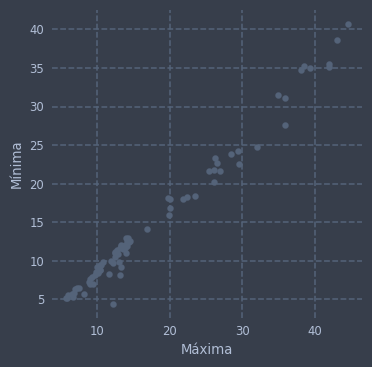

In [6]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

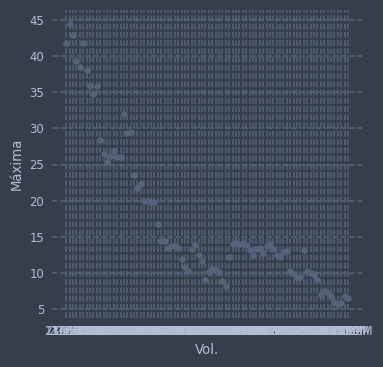

In [7]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

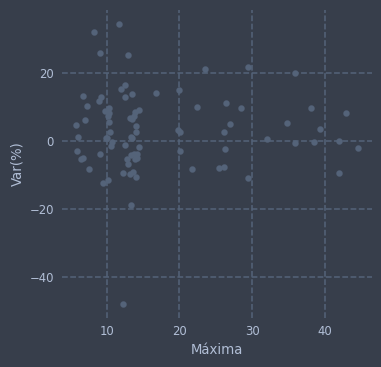

In [8]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [9]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [10]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


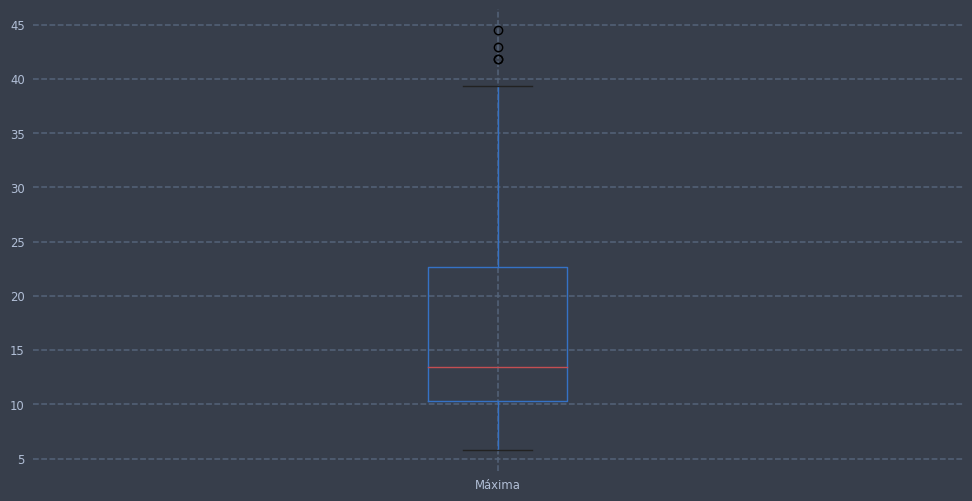

In [11]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

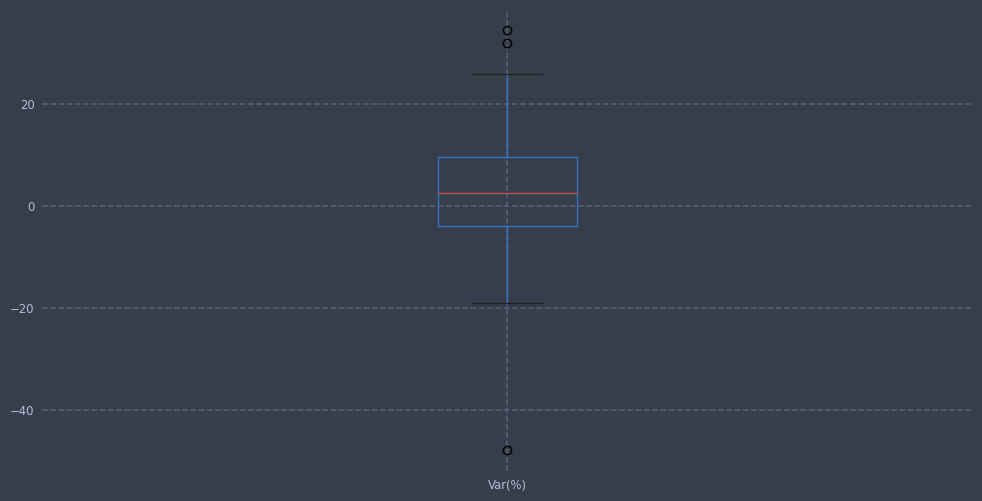

In [12]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

In [36]:
preco_comb_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2016-a-2018.csv")
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()
df_local_media = df_local_media.to_frame().reset_index()
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)
df_final["MÊS"] = pd.to_datetime(df_final["MÊS"])
df_final = df_final.sort_values(by=["MÊS"])
df_final= df_final[df_final["PRODUTO"] == "GASOLINA COMUM"]
df_final = df_final.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final.to_csv("PRECO_COMB_2016_2018")

In [5]:
df_local = preco_comb_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])

In [6]:
df_local_media = df_local["PREÇO MÉDIO REVENDA"].mean()

In [7]:
df_local_media = df_local_media.to_frame().reset_index()

In [9]:
df_brasil = preco_comb_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil["REGIÃO"] = "BRASIL"

In [10]:
df_final = pd.concat([df_local_media, df_brasil], ignore_index=True)

In [11]:
df_final.to_csv("novo_arquivo.csv", index=False)

In [12]:
df = pd.read_csv("arquivos/Preco_Combustivel/novo_arquivo.csv") 

In [13]:
df["MÊS"] = pd.to_datetime(df["MÊS"])

In [14]:
df = df.sort_values(by=["MÊS"])

In [17]:
df.to_csv("PRECO_COMB", index=False)

In [33]:
precocombustivel_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB")

In [34]:
precocombustivel_df = precocombustivel_df[precocombustivel_df["PRODUTO"] == "GASOLINA COMUM"]

In [21]:
precocombustivel_df = df.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})

In [35]:
precocombustivel_df.to_csv("PRECO_COMB_2016_2018") 

In [24]:
preco_comb2_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal-municipios-2019-a-2021.csv")
df_local2 = preco_comb2_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media2 = df_local2["PREÇO MÉDIO REVENDA"].mean()
df_local_media2 = df_local_media2.to_frame().reset_index()
df_brasil2 = preco_comb2_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil2["REGIÃO"] = "BRASIL"
df_final2 = pd.concat([df_local_media2, df_brasil2], ignore_index=True)
df_final2["MÊS"] = pd.to_datetime(df_final2["MÊS"])
df_final2 = df_final2.sort_values(by=["MÊS"])
df_final2= df_final2[df_final2["PRODUTO"] == "GASOLINA COMUM"]
df_final2 = df_final2.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final2.to_csv("PRECO_COMB_2019_2021")

In [25]:
precocombustivel19_21_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2019_2021")

In [28]:
preco_comb3_df = pd.read_csv("arquivos/Preco_Combustivel/editado-mensal_municipios-desde_jan2022_a_2024.csv")
df_local3 = preco_comb3_df.groupby(["MÊS", "PRODUTO", "REGIÃO"])
df_local_media3 = df_local3["PREÇO MÉDIO REVENDA"].mean()
df_local_media3 = df_local_media3.to_frame().reset_index()
df_brasil3 = preco_comb3_df.groupby(["MÊS", "PRODUTO"])["PREÇO MÉDIO REVENDA"].mean().to_frame().reset_index()
df_brasil3["REGIÃO"] = "BRASIL"
df_final3 = pd.concat([df_local_media3, df_brasil3], ignore_index=True)
df_final3["MÊS"] = pd.to_datetime(df_final3["MÊS"])
df_final3 = df_final3.sort_values(by=["MÊS"])
df_final3= df_final3[df_final3["PRODUTO"] == "GASOLINA COMUM"]
df_final3 = df_final3.groupby(["MÊS"]).agg({"PREÇO MÉDIO REVENDA": "mean"})
df_final3.to_csv("PRECO_COMB_2022_2024")


In [39]:
precocombustivel22_24_df = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2022_2024")

In [40]:
precocombustivel22_24_df

,MÊS,PREÇO MÉDIO REVENDA
0,2022-01-01,6.736561
1,2022-01-02,6.709887
2,2022-01-03,7.108884
3,2022-01-04,7.335032
4,2022-01-05,7.379761
5,2022-01-06,7.365138
6,2022-01-07,6.156560
7,2022-01-08,5.510157
8,2022-01-09,5.153197
9,2022-01-10,4.918640


In [65]:
precomb_2017_2024 = pd.read_csv("arquivos/Preco_Combustivel/PRECO_COMB_2017_2024.csv", parse_dates=True)

In [66]:
precomb_2017_2024

,MÊS,PREÇO MÉDIO REVENDA
0,2017-01-04,3.770485
1,2017-01-05,3.751664
2,2017-01-06,3.696870
3,2017-01-07,3.689708
4,2017-01-08,3.911672
...,...,...
79,2023-01-11,5.784060
80,2023-01-12,5.730224
81,2024-01-01,5.706699
82,2024-01-02,5.864322


In [104]:
# Selecionando coluna "Último"
petr3_df = petr3_df["Último"]

In [124]:
dfcombinados = precomb_2017_2024.join(petr3_df)
novoultimo = pd.read_csv("arquivos/Preco_Combustivel/novoultimo.csv")

In [126]:
dfcombinados["Último"] = novoultimo["ÚltimoFinal"]

In [127]:
dfcombinados.to_csv("dfcombinadosfinal.csv")

In [129]:
dfcombinadosfinal = pd.read_csv("arquivos/Preco_Combustivel/dfcombinadosfinal.csv")

In [130]:
dfcombinadosfinal

,Unnamed: 0,MÊS,PREÇO MÉDIO REVENDA,Último
0,0,2017-01-04,3.770485,5.94
1,1,2017-01-05,3.751664,5.64
2,2,2017-01-06,3.696870,5.46
3,3,2017-01-07,3.689708,5.71
4,4,2017-01-08,3.911672,5.78
...,...,...,...,...
79,79,2023-01-11,5.784060,37.70
80,80,2023-01-12,5.730224,38.98
81,81,2024-01-01,5.706699,42.16
82,82,2024-01-02,5.864322,41.22


In [136]:
dfcombinadosfinal = dfcombinadosfinal.drop("Unnamed: 0", axis=1)

In [137]:
dfcombinadosfinal

,MÊS,PREÇO MÉDIO REVENDA,Último
0,2017-01-04,3.770485,5.94
1,2017-01-05,3.751664,5.64
2,2017-01-06,3.696870,5.46
3,2017-01-07,3.689708,5.71
4,2017-01-08,3.911672,5.78
...,...,...,...
79,2023-01-11,5.784060,37.70
80,2023-01-12,5.730224,38.98
81,2024-01-01,5.706699,42.16
82,2024-01-02,5.864322,41.22


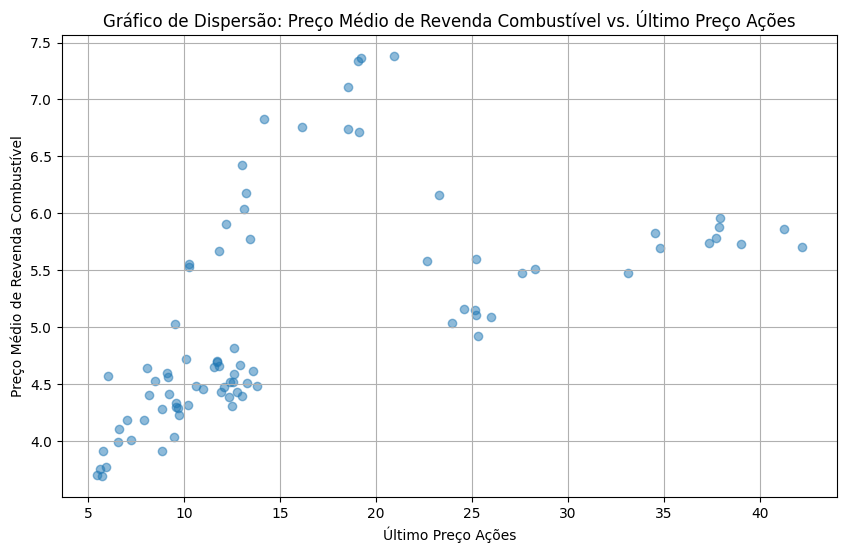

In [143]:
preco_medio_revenda = dfcombinadosfinal['PREÇO MÉDIO REVENDA']
ultimo = dfcombinadosfinal['Último']

plt.figure(figsize=(10, 6))
plt.scatter(ultimo, preco_medio_revenda, alpha=0.5)

plt.title('Gráfico de Dispersão: Preço Médio de Revenda Combustível vs. Último Preço Ações')
plt.xlabel('Último Preço Ações')
plt.ylabel('Preço Médio de Revenda Combustível')

plt.grid(True)
plt.show()

In [23]:
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
         "Novembro", "Dezembro")
for i in range(0, 12):
    dataIpcaMedio = dataIpcaMedio._append({"Mes": meses[i]}, ignore_index=True)

for j in range(17, 22):  
    for i in range(1, 13):
        if i < 10:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}0{i}Subitem.csv")
        else:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i}Subitem.csv")
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

for cln in dataIpcaMedio:
    if cln == 'Mes': continue
    print(f'Var       {dataIpcaMedio[cln].var():.6f}')
    print(dataIpcaMedio[cln].describe())
    print()

Var       0.031493
count     12.00
unique    12.00
top        0.38
freq       1.00
Name: 2017, dtype: float64

Var       0.133857
count     12.00
unique    12.00
top        0.29
freq       1.00
Name: 2018, dtype: float64

Var       0.122093
count     12.00
unique    12.00
top        0.32
freq       1.00
Name: 2019, dtype: float64

Var       0.247982
count     12.00
unique    12.00
top        0.21
freq       1.00
Name: 2020, dtype: float64

Var       0.093348
count     12.00
unique    12.00
top        0.25
freq       1.00
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IPCA ao longo dos anos')

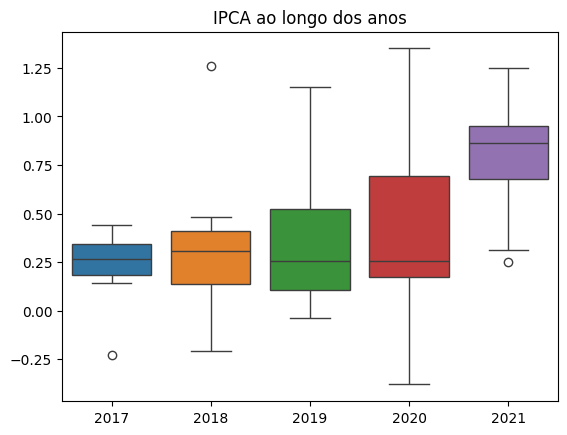

In [24]:
sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')

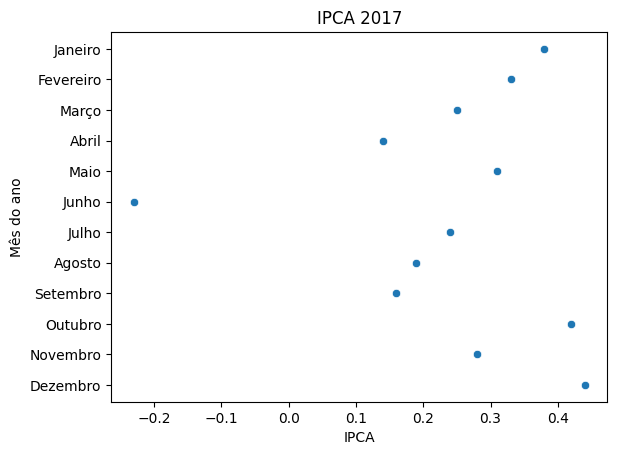

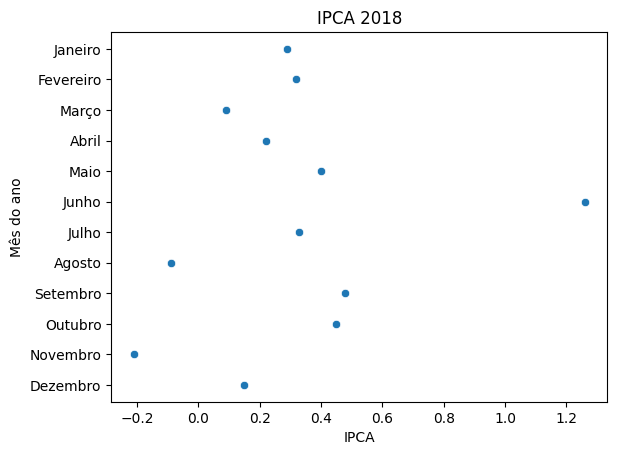

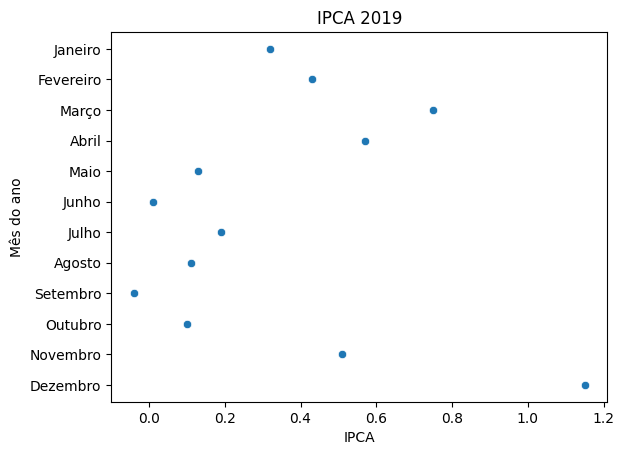

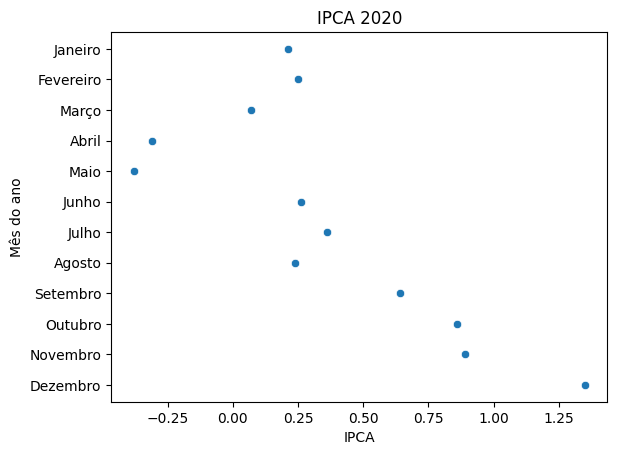

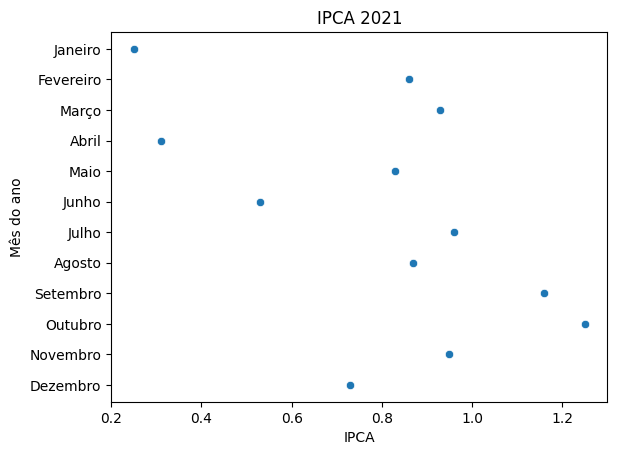

In [27]:
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x=cln, y='Mes')
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')
    plt.show()